<a href="https://colab.research.google.com/github/nagamamo/financial_data_science/blob/main/5_2_timeseries_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5.2　Prophetによる日経平均株価の予測

以下では、Prophetを用いた株価の予測例を紹介します。ライブラリは、まず数値計算用のpandas、時系列モデルにベイズ統計を用いるためのstan、そして時系列モデル用のprophet、最後に図表用のライブラリであるmatplotlibを読み込みます。Prophetではベイズ統計を用いることで、新たな情報（データ）が加わる度に、予測時の確率分布を変化させます。

In [4]:
#[1]ライブラリ読み込み
import pandas as pd
from prophet import Prophet #時系列モデル用ライブラリ
import matplotlib.pyplot as plt 

続いて日経平均株価のヒストリカル・データを取得します。

In [5]:
#[2]株価データ取得
url = "https://github.com/nagamamo/data/blob/main/5_nikkei225_data.csv?raw=true"#Git-hubからCSVデータの入手
nikkei = pd.read_csv(url)#pandasデータフレームの作成
nikkei = nikkei.set_index("Date")#日時をインデックスへ変更

Prophetでは変数名を日時＝'ds'、予測する変数＝'y'に指定されています。このため一度、データフレームのインデックス名を一度リセットして日時をdsへ、予測したい変数をｙへ変数名を変更します。

In [6]:
#[3]データフレームの整理
nikkei.reset_index(inplace=True) #prophetの変数定義への変更するためリセット
nikkei = nikkei.rename(columns={'Date': 'ds','nikkei': 'y'}) #prophetの変数定義への変更

最後のセルでは、一行目で時系列モデルにProphetを使用する指示を与えます。二行目においてヒストリカル・データをフィッティングし、三行目で予測期間を指定します。これらを実施した後、予測結果を保存し、可視化します。

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp22n9kwyd/_jhgkl0v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp22n9kwyd/5d6q3jv8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41527', 'data', 'file=/tmp/tmp22n9kwyd/_jhgkl0v.json', 'init=/tmp/tmp22n9kwyd/5d6q3jv8.json', 'output', 'file=/tmp/tmp22n9kwyd/prophet_model2i185203/prophet_model-20230430024440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:44:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:44:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


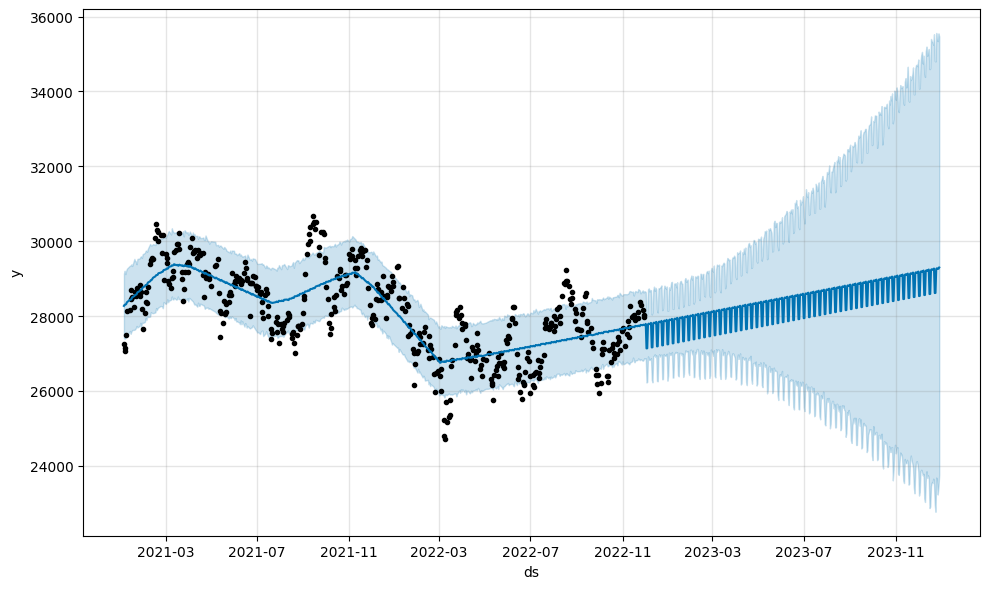

In [9]:
#[4]2023年12月29日の日経平均株価の予測
model = Prophet() #時系列モデルにprophetを採用：モデル名をmodel
model.fit(nikkei) #データを時系列モデルにフィッティング
future = model.make_future_dataframe(periods=394,freq="d") #予測の期間と頻度の定義
forecast = model.predict(future)#予測結果の保存
model.plot(forecast)#可視化
plt.show()

尚、予測結果の各データは下記により取得、保存できます。

In [ ]:
#[5]予測結果のデータ確認
pd.set_option("display.max_rows", len(forecast))
forecast